In [8]:
import cvxopt
import itertools
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as la

In [9]:
def generate_data(n=100):
    x_1 = 0.1+np.random.rand(n)
    y_1 = 2*np.random.rand(n) - 1
    x_2 = -1*(0.1+np.random.rand(n))
    y_2 = -1*(2*np.random.rand(n) - 1)
    class_1 = np.stack((x_1, y_1), axis=-1)
    class_2 = np.stack((x_2, y_2), axis=-1)
    
    return class_1, class_2

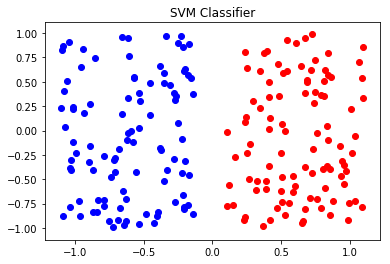

In [10]:
def plot_data(class_1, class_2, w=None, b=None):
    """
    class_1 ((n,2) ndarray): the (x,y) coordinates of each point.
    class_2 ((n,2) ndarray): the (x,y) coordinates of each point.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(class_1[:,0], class_1[:,1], color='red', marker='o')
    ax.scatter(class_2[:,0], class_2[:,1], color='blue', marker='o')
    # Todo: refactor to use parameteric t-based equation
    if w is not None and b is not None:
        if w[1] != 0:
            x = np.linspace(-1, 1, 100)
            y = (-b - w[0]*x)/w[1]
        else:
            y = np.linspace(-1, 1, 100)
            x = (-b - w[1]*y)/w[0]
        ax.plot(x, y, color='green')
    ax.set_title("SVM Classifier")
    plt.show()
   
data = generate_data()
class_1, class_2 = data
plot_data(*data)

h1 margin: 1.3889041083465719
h2 margin: 1.0987642860304248


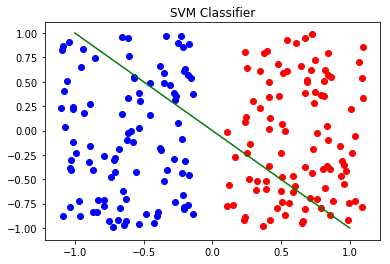

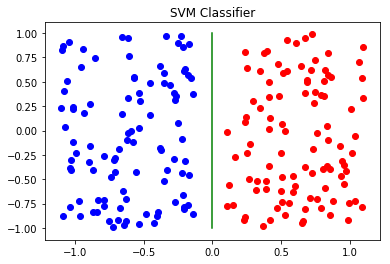

margin: 2.23606797749979


In [11]:
def find_hyperplane(class_1, class_2):
    """
    Find the hyperplane with formula wx + b = 0 such that it separates the two classes.
    
    Returns:
        w (float): the hyperplane gradient.
        b (float): the translation shift.
    """
    
def margin_single_point(w, b, x):
    """
    Fx 2x+y-4=0. (2,0) and (0,4) are two points. The weight vector (2, 1) is perpendicular to the hyperplane.
    To test, margin([2,1], -4, [4,1]) should be sqrt(5). alpha should be 1.
    So to find the distance, we need to look in the weight vector direction until x-alpha*w hits the hyper plane.
    Satisfy w.T @ (x-alpha*w) + b = 0.
    w.T@x - alpha*w.T@w + b = 0
    alpha = (w.T@x + b) / (w.T@w)
    
    Returns:
        the distance between the hyperplane and point x.
    """
    def f(x):
        return np.dot(w, x) + b
    
    alpha = f(x) / np.dot(w,w)
    assert np.isclose(f(x-alpha*w), 0), "Incorrect margin. f(x) = {}".format(f(x-alpha*w))
    return la.norm(alpha*w)

def margin(w, b, class_1, class_2):
    margins = [ margin_single_point(w, b, x) for x in itertools.chain(class_1, class_2)]
    return np.max(margins)

h1 = np.array([1, 1])
h2 = np.array([1, 0])

print("h1 margin:", margin(h1, 0, class_1, class_2))
print("h2 margin:", margin(h2, 0, class_1, class_2))

plot_data(class_1=class_1, class_2=class_2, w=h1, b=0)
plot_data(class_1=class_1, class_2=class_2, w=h2, b=0)


w = np.array([2, 1])
b = -4
x = np.array([4, 1])
dist = margin_single_point(w, b, x)
print("margin:", dist)
#print(np.sqrt(5))

We need to define the support vectors, because the
maximal margin hyperplane (MMH) depends only on these
This is solving a convex optimization problem.

Minimize -M  
Subject to sum(w_i^2) = 1  
and y_i*(dot(w,x) + b) >= M   

In [ ]:
c = np.array([-1])
